# **1. Perkenalan Dataset**


Dataset ini berjudul **Shop Customer Data** yang diambil dari [Kaggle](https://www.kaggle.com/datasets/datascientistanna/customers-dataset). Dataset ini memberikan analisis mendetail tentang pelanggan ideal dari sebuah toko. Dataset ini membantu bisnis untuk lebih memahami pelanggannya. Pemilik toko mendapatkan informasi tentang pelanggan melalui kartu keanggotaan.

Dataset ini terdiri dari 2000 catatan dan 8 kolom, yaitu:

1. **Customer ID**: ID unik untuk setiap pelanggan.
2. **Gender**: Jenis kelamin pelanggan.
3. **Age**: Usia pelanggan.
4. **Annual Income**: Pendapatan tahunan pelanggan.
5. **Spending Score**: Skor yang diberikan oleh toko, berdasarkan perilaku dan kebiasaan belanja pelanggan.
6. **Profession**: Profesi pelanggan.
7. **Work Experience**: Pengalaman kerja pelanggan dalam tahun.
8. **Family Size**: Ukuran keluarga pelanggan.

# **2. Import Library**

Pada tahap ini, kita akan mengimport library yang akan digunakan dalam proses analisis data dan pembuatan model machine learning.

In [1]:
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.decomposition import PCA # Mengimpor PCA untuk reduksi dimensi
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import LabelEncoder # Mengimpor LabelEncoder untuk mengubah data kategori menjadi numerik
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import numpy as np # Mengimpor pustaka numpy untuk operasi matematika
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data
from sklearn.ensemble import RandomForestClassifier # Mengimpor RandomForestClassifier untuk klasifikasi
from sklearn.model_selection import train_test_split # Mengimpor train_test_split untuk membagi data

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset yang akan digunakan dalam analisis data.

In [2]:
df = pd.read_csv('data/Shop Customer Data/Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


Dari dataset yang dimuat, kita dapat melihat bahwa dataset terdiri dari 2000 baris dan 8 kolom.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan eksplorasi data untuk memahami karakteristik dari dataset yang dimuat.

## Memahami Struktur Data

In [3]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Dari hasil `.info()` yang dilakukan, kita dapat melihat bahwa dataset terdiri dari 2000 baris dan 8 kolom. Selain itu, kita juga dapat melihat tipe data dari setiap kolom. Tipe data yang terdapat pada dataset ini adalah sebagai berikut:

1. **int64**: `Customer ID`, `Age`, `Annual Income`, `Spending Score`, `Work Experience`, dan `Family Size`.
2. **object**: `Gender` dan `Profession`.

In [4]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


Dari hasil `.describe()` yang dilakukan, kita dapat melihat ringkasan statistik dari dataset yang dimuat seperti nilai rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum.

## Identifikasi Data yang Hilang

In [5]:
# Lihat apakah ada nilai yang hilang dalam dataset
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Dari hasil identifikasi data yang hilang, kita dapat melihat bahwa terdapat data yang hilang pada kolom `Profession` sebanyak 35 data. Kita akan menangani data yang hilang tersebut pada tahap Data Preprocessing.

## Visualisasi Data

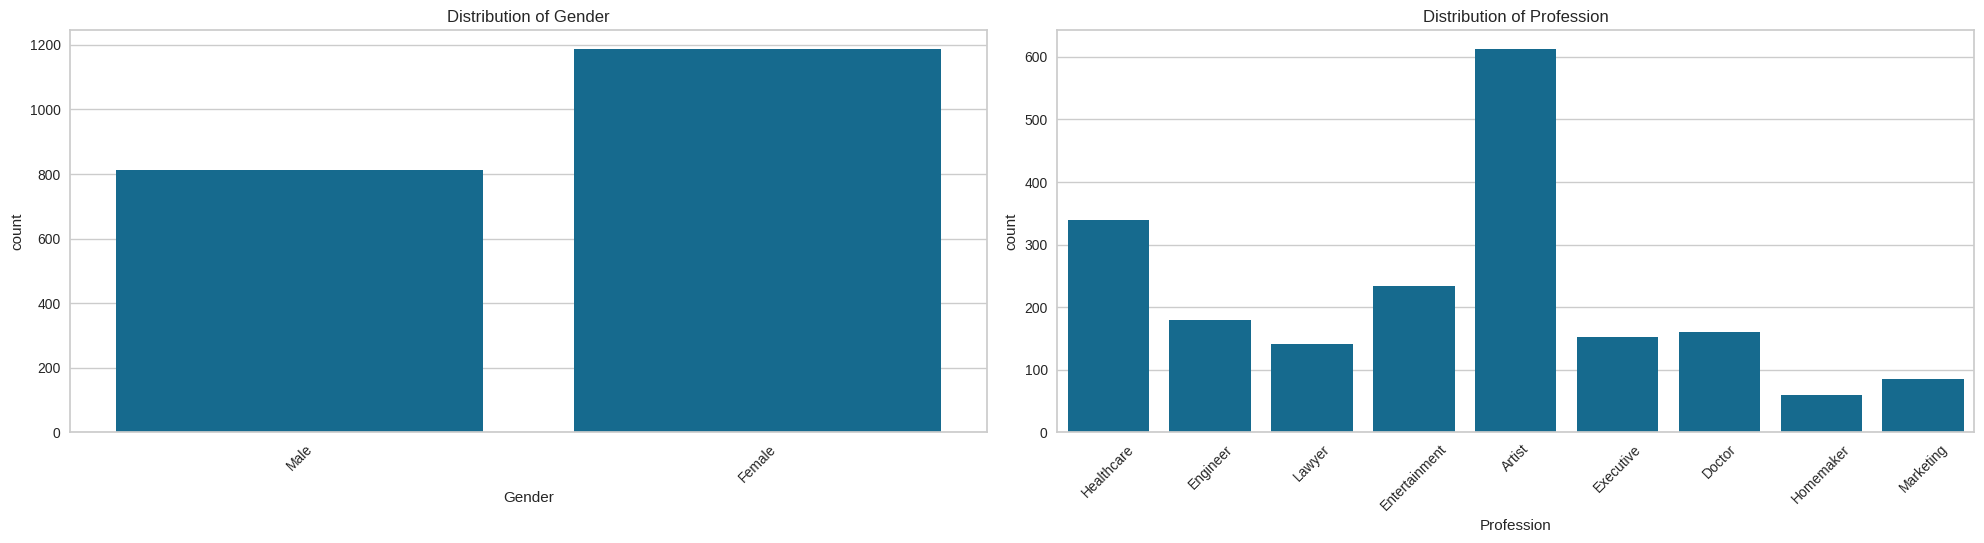

In [7]:
# Visualisasi distribusi variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Dari hasil visualisasi data yang dilakukan, kita dapat melihat distribusi dari data kategorikal seperti `Gender` dan `Profession`. Dapat dilihat bahwa jumlah pelanggan wanita lebih banyak dibandingkan dengan pelanggan pria. Selain itu, pelanggan dengan profesi `Artist` merupakan profesi yang paling banyak dimiliki oleh pelanggan.

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

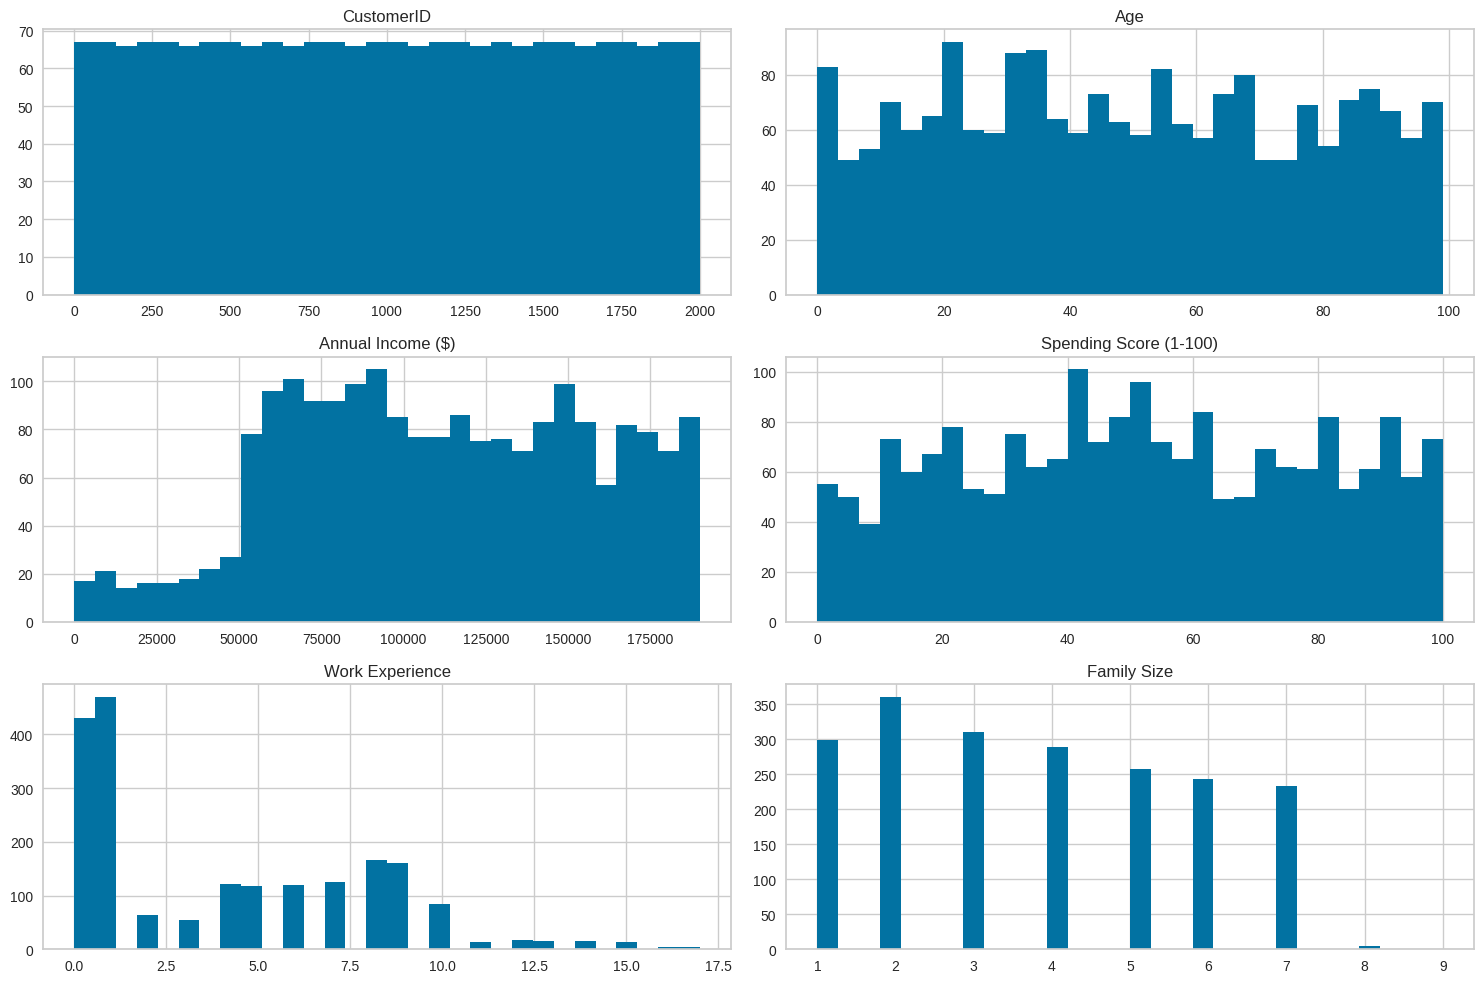

In [8]:
# Statistik deskriptif untuk variabel numerik
print(df.describe())

# Visualisasi distribusi variabel numerik dengan histogram
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

<!-- Data numerik seperti `Age`, `Annual Income`, `Spending Score`, `Work Experience`, dan `Family Size` juga divisualisasikan. Dapat dilihat bahwa distribusi data pada kolom `Age` dan `Annual Income` cenderung normal. Sedangkan pada kolom `Spending Score`, distribusi data cenderung terpusat pada nilai 50. Pada kolom `Work Experience`, distribusi data cenderung merata. Sedangkan pada kolom `Family Size`, distribusi data cenderung terpusat pada nilai 2. -->

Data numerik seperti `Age`, `Annual Income`, `Spending Score`, `Work Experience`, dan `Family Size` juga divisualisasikan. Dapat dilihat bahwa distribusi data pada kolom `Age` dan `Spending Score` cenderung normal. Sedangkan pada kolom `Annual Income`, distribusi data cenderung terpusat pada nilai di atas 50000. Pada kolom `Work Experience`, terlihat pelanggan dengan pengalaman kerja di bawah 2 tahun lebih banyak dibandingkan dengan pelanggan dengan pengalaman kerja di atas 2 tahun. Sedangkan pada kolom `Family Size`, distribusi data cenderung terpusat pada nilai 2.

# **5. Data Preprocessing**

Pada tahap ini, kita akan melakukan data preprocessing seperti mengatasi data yang hilang, menghapus kolom duplikat, identifikasi data outlier, dan encoding data kategorikal.

## Menghapus atau Menangani Data Kosong (Missing Values)


In [9]:
# Cek apakah ada nilai yang hilang dalam dataset
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Terlihat bahwa terdapat data yang hilang pada kolom `Profession` sebanyak 35 data. Kita akan menangani data yang hilang tersebut dengan menghapus baris yang mengandung data kosong.

In [10]:
# Hapus data yang mengandung missing values
df = df.dropna()

In [11]:
# Cek kembali apakah masih ada nilai yang hilang dalam dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

Setelah data yang hilang dihapus, kita dapat melihat bahwa tidak ada data yang hilang pada dataset.

## Menghapus Data Duplikat


In [12]:
# Cek apakah ada data duplikat dalam dataset
df.duplicated().sum()

0

Dari hasil identifikasi data duplikat, kita dapat melihat bahwa tidak ada data duplikat pada dataset.

## Deteksi dan Penanganan Outlier


In [13]:
# Cek apakah ada data outlier dalam dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menggunakan IQR untuk mendeteksi outlier
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outlier jika nilai berada di luar rentang [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Jumlah outlier dalam dataset:")
print(outliers)

Jumlah outlier dalam dataset:
CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Work Experience           5
Family Size               0
dtype: int64


Dari hasil deteksi outlier yang dilakukan, kita dapat melihat bahwa terdapat outlier pada kolom `Work Experience`. Kita akan melihat data outlier tersebut.

In [42]:
# Lihat data yang mengandung outlier
outliers_df = df[((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_df['Work Experience']

392    17
405    17
473    17
566    17
603    17
Name: Work Experience, dtype: int64

Dari hasil pengecekan data outlier, kita dapat melihat bahwa 5 data outlier pada kolom `Work Experience` memiliki nilai yang sama, yaitu 17. Kita tidak akan menghapus data outlier tersebut karena data outlier tersebut merupakan data yang valid.

## Encoding Data Kategorikal

Pada tahap ini, kita akan melakukan encoding data kategorikal pada kolom `Gender` dan `Profession` menggunakan metode `LabelEncoder`.

In [15]:
# Kolom kategorikal yang akan diencode
categorical_columns = df.select_dtypes(include=['object']).columns

# Inisialisasi dictionary untuk label encoding
label_encoders = {}

# Melakukan label encoding untuk setiap kolom kategorikal
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Menampilkan data yang telah diencode
pd.DataFrame(df, columns=categorical_columns)

/tmp/ipykernel_941821/3045254899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
/tmp/ipykernel_941821/3045254899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])


,Gender,Profession
0,1,5
1,1,2
2,0,2
3,0,7
4,0,3
...,...,...
1995,0,0
1996,0,1
1997,1,5
1998,1,4


Selanjutnya, kita dapat melihat mapping dari data kategorikal yang telah di-encode.

In [37]:
for column in categorical_columns:
    print(f"Label Encoder for {column}:")
    for index, class_ in enumerate(label_encoders[column].classes_):
        print(f"{index}: {class_}")
    print()

Label Encoder for Gender:
0: Female
1: Male

Label Encoder for Profession:
0: Artist
1: Doctor
2: Engineer
3: Entertainment
4: Executive
5: Healthcare
6: Homemaker
7: Lawyer
8: Marketing



# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, kita akan membangun model clustering menggunakan algoritma K-Means. Kita akan melakukan clustering dengan nilai K=3.

In [18]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)

# Melakukan clustering
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

## **b. Evaluasi Model Clustering**

Selanjutnya, kita akan mengevaluasi model clustering yang telah dibangun menggunakan metode Silhouette Score.

In [19]:
# Menghitung Silhouette Score
silhouette_avg_before = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score sebelum feature selection: {silhouette_avg_before:.2f}")

Silhouette Score sebelum feature selection: 0.56


Dari hasil evaluasi model clustering, kita dapat melihat bahwa model clustering yang telah dibangun memiliki nilai Silhouette Score sebesar 0.56.

Untuk meningkatkan performa model clustering, kita akan menggunakan metode Elbow untuk menentukan jumlah cluster yang optimal.

Jumlah Cluster: 2, Silhouette Score: 0.62
Jumlah Cluster: 3, Silhouette Score: 0.56
Jumlah Cluster: 4, Silhouette Score: 0.53
Jumlah Cluster: 5, Silhouette Score: 0.56
Jumlah Cluster: 6, Silhouette Score: 0.57
Jumlah Cluster: 7, Silhouette Score: 0.55
Jumlah Cluster: 8, Silhouette Score: 0.53
Jumlah Cluster: 9, Silhouette Score: 0.55
Jumlah Cluster: 10, Silhouette Score: 0.54


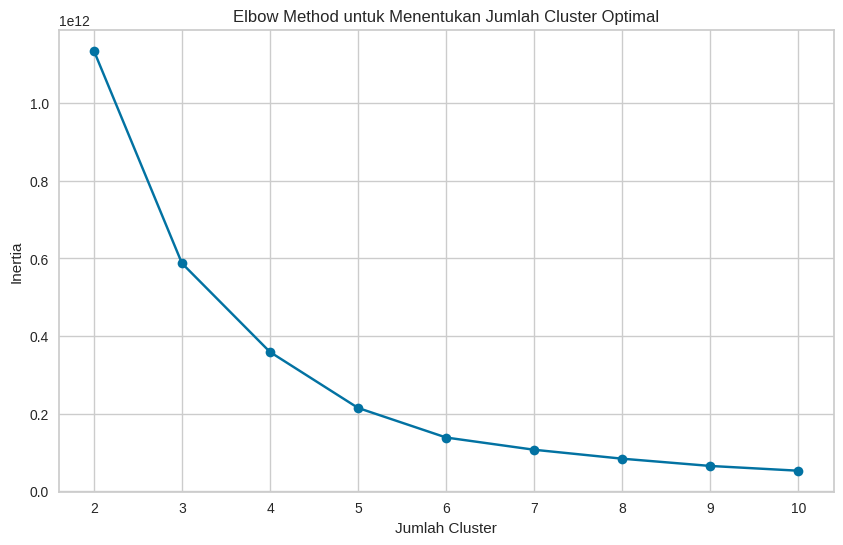

Jumlah cluster terbaik berdasarkan Silhouette Score: 2


In [39]:
# Inisialisasi list untuk menyimpan nilai inertia dan silhouette score
inertia = []
silhouette_scores = []

# Rentang jumlah cluster yang akan diuji
cluster_range = range(2, 11)

# Loop untuk menghitung inertia dan silhouette score untuk setiap jumlah cluster
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {silhouette_avg:.2f}")

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

# Print Silhouette Score terbaik
best_cluster = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Jumlah cluster terbaik berdasarkan Silhouette Score: {best_cluster}")

Dari hasil metode Elbow, dan skor evaluasi Silhouette Score, kita dapat melihat bahwa jumlah cluster yang optimal adalah 2.

In [41]:
# Latih kembali model KMeans menggunakan jumlah cluster terbaik berdasarkan silhouette score
kmeans_best = KMeans(n_clusters=best_cluster, random_state=0)
kmeans_best.fit(df)

# Hitung silhouette score setelah menggunakan jumlah cluster terbaik
silhouette_avg_after_best_cluster = silhouette_score(df, kmeans_best.labels_)

# Bandingkan silhouette score sebelum dan sesudah menggunakan jumlah cluster terbaik
print(f"Silhouette Score sebelum menggunakan jumlah cluster terbaik: {silhouette_avg_before:.2f}")
print(f"Silhouette Score setelah menggunakan jumlah cluster terbaik: {silhouette_avg_after_best_cluster:.2f}")

Silhouette Score sebelum menggunakan jumlah cluster terbaik: 0.56
Silhouette Score setelah menggunakan jumlah cluster terbaik: 0.62


Setelah menggunakan jumlah cluster terbaik, kita dapat melihat bahwa model clustering yang telah dibangun memiliki peningkatan nilai Silhouette Score dari 0.56 menjadi 0.62.

## **c. Feature Selection (Opsional)**

Pada tahap ini, kita akan melakukan feature selection untuk menentukan fitur yang paling berpengaruh dalam pembentukan cluster.

In [25]:
# Add the cluster labels to the dataframe
df['Cluster'] = kmeans_best.labels_

# Split the data into training and testing sets
X = df.drop('Cluster', axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Get the indices of the top features
indices = np.argsort(importances)[::-1]

# Get the names of the top features
features = X.columns

# Print the top features
print("Top features:")
for i in range(len(features)):
    print(f"{i + 1}. {features[indices[i]]} ({importances[indices[i]]})")

/tmp/ipykernel_941821/1274572007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans_best.labels_


Top features:
1. Annual Income ($) (0.845231028896627)
2. CustomerID (0.08782548480643378)
3. Age (0.020535223449820644)
4. Spending Score (1-100) (0.01802769314594839)
5. Work Experience (0.00988354866592325)
6. Family Size (0.00854381686872985)
7. Profession (0.007668503368339196)
8. Gender (0.002284700798177944)


Dengan menggunakan metode Feature Importance, kita dapat melihat bahwa fitur yang paling berpengaruh dalam pembentukan cluster adalah `Annual Income`, `Customer ID`, `Age`, `Spending Score`, dan `Work Experience`. Selanjutnya, kita akan membangun model clustering hanya dengan menggunakan fitur-fitur tersebut.

In [27]:
# Pilih top 5 fitur berdasarkan feature importances
top_5_features = features[indices[:5]]

# Buat dataframe baru hanya dengan top 5 fitur
df_top_5 = df[top_5_features]

# Tampilkan dataframe baru
df_top_5.head()

,Annual Income ($),CustomerID,Age,Spending Score (1-100),Work Experience
0,15000,1,19,39,1
1,35000,2,21,81,3
2,86000,3,20,6,1
3,59000,4,23,77,0
4,38000,5,31,40,2


In [28]:
# Latih model KMeans menggunakan df_top_5 dengan jumlah cluster terbaik
kmeans_top_5 = KMeans(n_clusters=best_cluster, random_state=0)
kmeans_top_5.fit(df_top_5)

# Hitung silhouette score setelah menggunakan df_top_5
silhouette_avg_top_5 = silhouette_score(df_top_5, kmeans_top_5.labels_)

# Bandingkan silhouette score sebelum dan sesudah menggunakan df_top_5
print(f"Silhouette Score sebelum menggunakan df_top_5: {silhouette_avg_before:.2f}")
print(f"Silhouette Score setelah menggunakan df_top_5: {silhouette_avg_top_5:.2f}")

Silhouette Score sebelum menggunakan df_top_5: 0.56
Silhouette Score setelah menggunakan df_top_5: 0.62


Dari hasil feature selection, kita dapat melihat bahwa model clustering yang telah dibangun hanya dengan menggunakan fitur-fitur yang paling berpengaruh memiliki nilai Silhouette Score yang sama dengan model clustering sebelumnya, yaitu 0.62. Selanjutnya, kita akan memperbaharui hasil clustering menggunakan model setelah feature selection.

In [29]:
# Perbarui kolom Cluster menggunakan hasil KMeans terbaru
df['Cluster'] = kmeans_top_5.labels_

# Tampilkan beberapa baris pertama dari dataframe yang telah diperbarui
df.head()

/tmp/ipykernel_941821/284307709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans_top_5.labels_


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,0
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,0
4,5,0,31,38000,40,3,2,6,0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi. Berikut adalah visualisasi hasil clustering menggunakan grafik scatter plot.

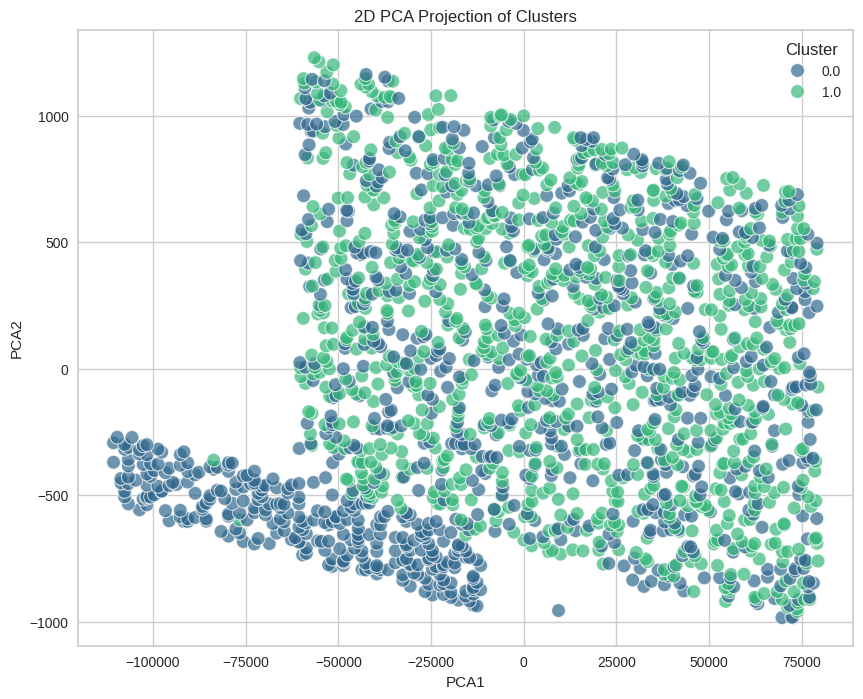

In [31]:
# Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the PCA results and the cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('2D PCA Projection of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Pada tahap ini, kita akan menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

          CustomerID    Gender        Age  Annual Income ($)  \
Cluster                                                        
0         851.902708  0.413240  48.661986       72173.180542   
1        1153.163223  0.399793  49.134298      150210.535124   

         Spending Score (1-100)  Profession  Work Experience  Family Size  
Cluster                                                                    
0                     49.785356    2.751254         3.794383     3.578736  
1                     52.411157    2.912190         4.399793     3.941116  


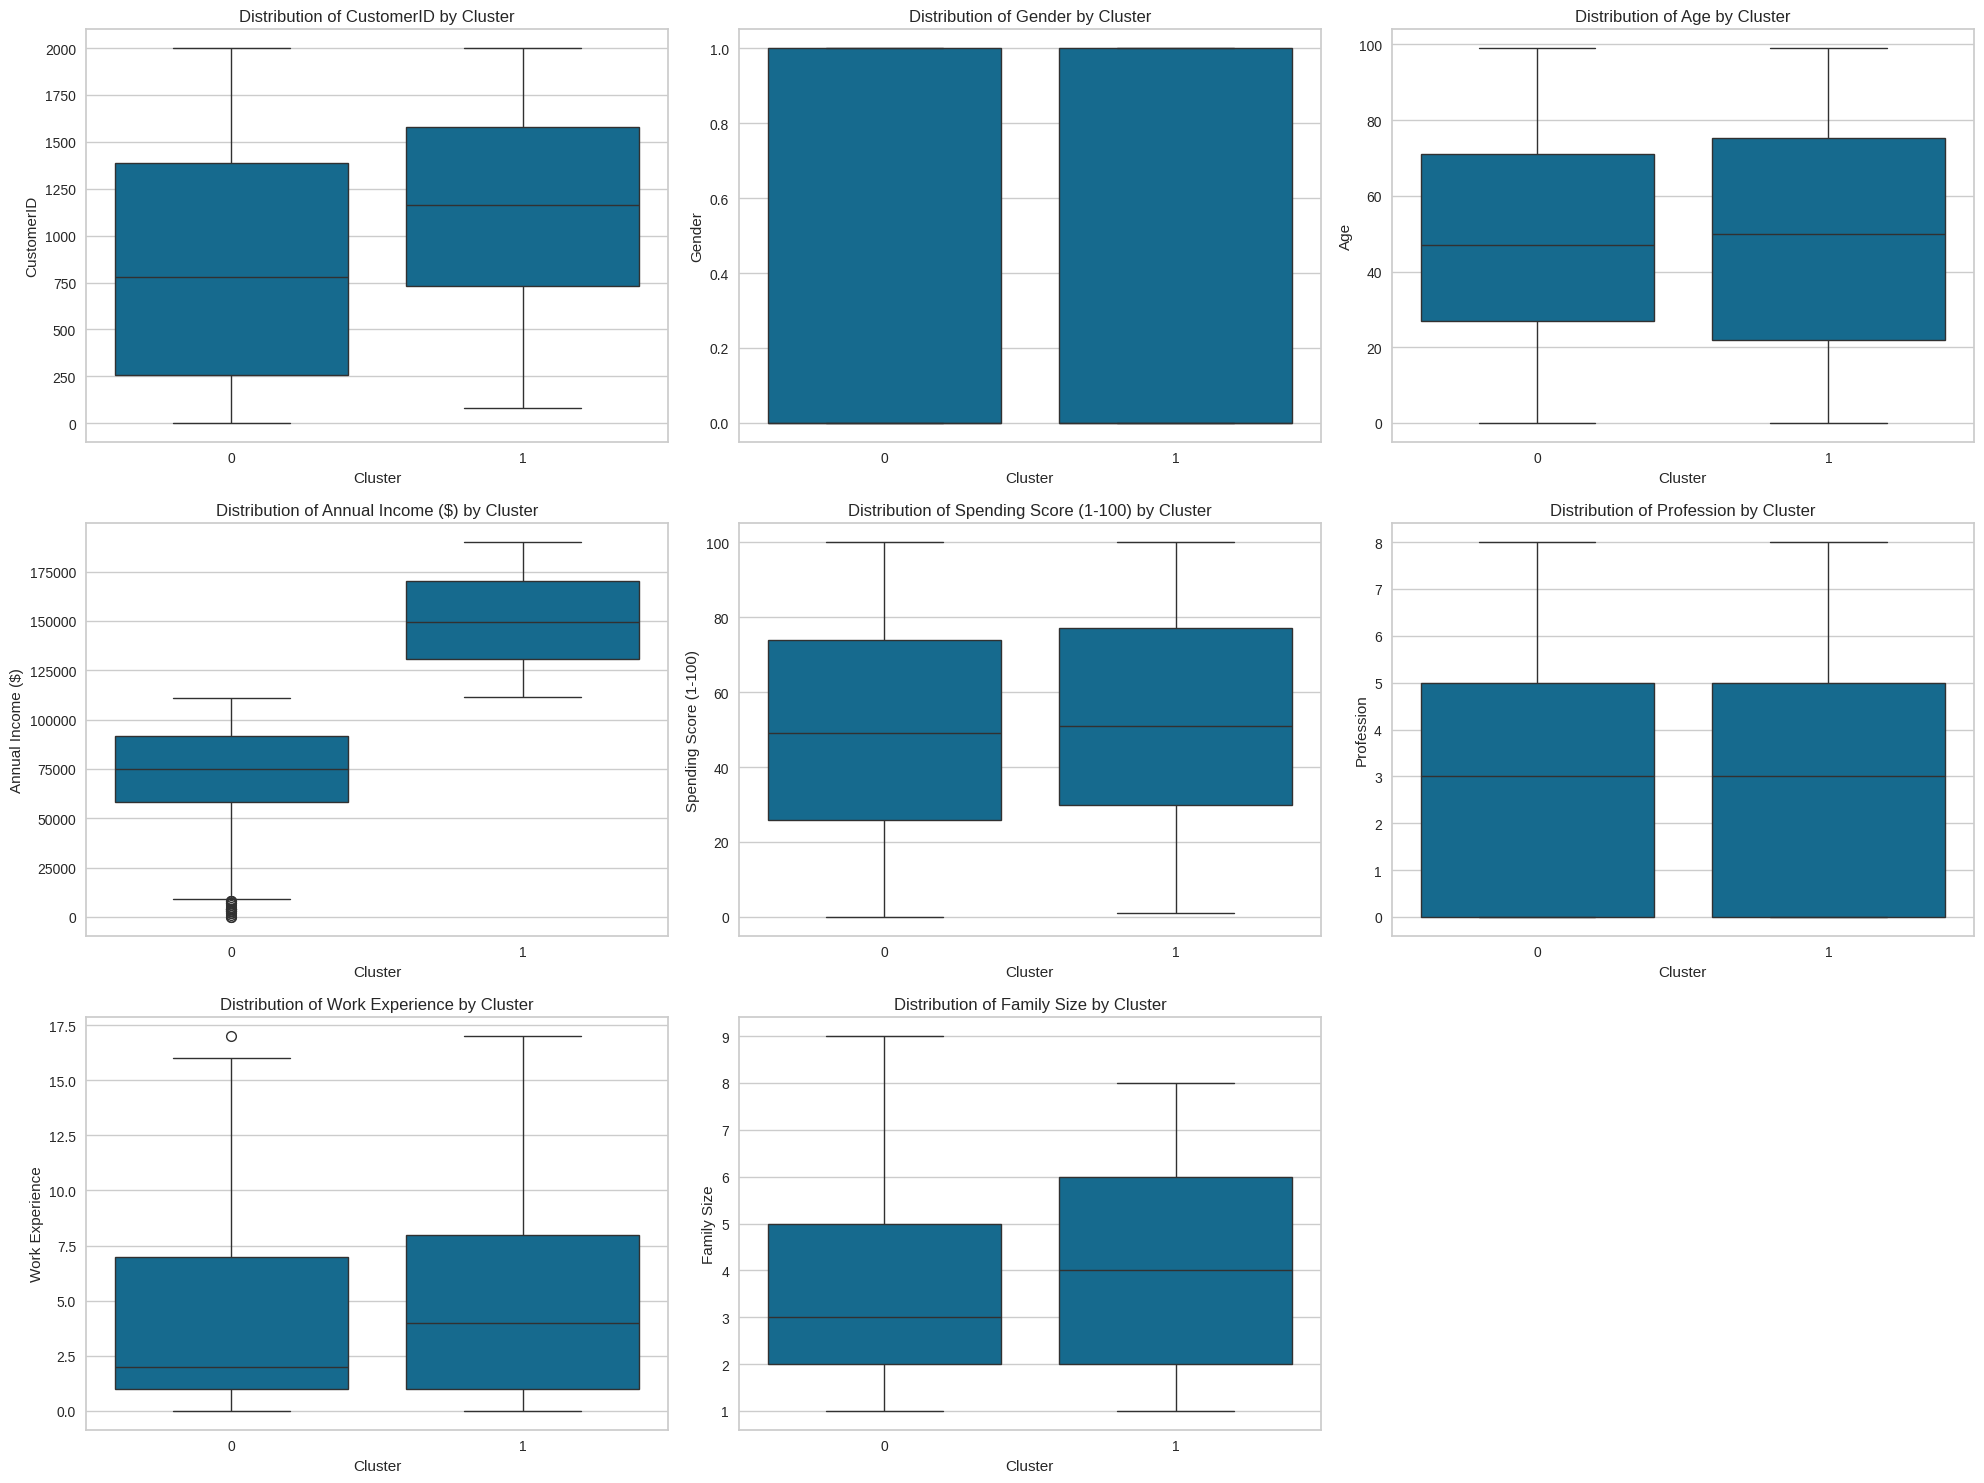

In [32]:
# Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Visualisasi distribusi nilai dalam cluster
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns[:-1], 1):  # Exclude the 'Cluster' column
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.tight_layout()

plt.show()

Berikut adalah analisis dan interpretasi hasil clustering berdasarkan karakteristik tiap cluster.

1. Cluster 0:

    - Age: Rata-rata usia di Cluster 0 adalah 48 tahun.
    - Income: Rata-rata pendapatan di Cluster 0 adalah $72,173.
    - Spending Score: Rata-rata spending score di Cluster 0 adalah 49.
    - Interpretasi: Cluster 0 terdiri dari pelanggan dengan usia menengah, pendapatan menengah, dan spending score sedang.

2. Cluster 1:

    - Age: Rata-rata usia di Cluster 1 adalah 49 tahun.
    - Income: Rata-rata pendapatan di Cluster 1 adalah $150,210.
    - Spending Score: Rata-rata spending score di Cluster 1 adalah 52.
    - Interpretasi: Cluster 1 terdiri dari pelanggan dengan usia menengah, pendapatan tinggi, dan spending score sedang.

# **7. Mengeksport Data**

Terakhir, kita akan mengeksport data hasil clustering ke dalam format CSV.

In [35]:
df.to_csv('data/Shop Customer Data/Clustered_Customers.csv', index=False)